# Практическая работа №3: Статистический анализ социальных сетей.
Выполнила студенка гр. 0382 Здобнова Ксения. Вариант №32.

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** - элемент сети, представляющий собой пару акторов и возможнную связь между ними:

$$ D_{ij} = (X_{ij}, X_{i,j}), i \neq j$$

Виды диад:
* Взаимная диада: $D_{i,j} = (1, 1)$

* Ассиметричная диада: $D_{i,j} = (1, 0)$, $D_{i,j} = (0, 1)$

* Нулевая диада:  $D_{i,j} = (0, 0)$

**Цензус диад** - это тройка чисел $<M, A, N>$, где:
* $M = \sum_{i < j}(x_{ij}x_{ji})$ - кол-во взаимных диад;

* $A = x_{++} - 2M$ - кол-во асимметричных диад;

* $N = C^2_g - A - M$ - кол-во нулевых диад.

**Индекс взаимности Каца-Пауэлла** - характеристика измерения тенденции акторов в группе:

$$-\infty < \rho_{kp} \leq 1$$

Индекс взаимности основан на ожидании количества взаимных диад, предполгая, что выбор делается акторами случайным образом.

Фиксированный выбор:

* Каждый актор делает $d$ выборов из $(g-1)$ акторов, доступных для выбора

* Вероятность взаимного выбора между любой произвольной парой акторов:
$$\frac {d^2}{(g-1)^2}$$

* Оценка $\rho_{kp}$ по методу моментов:
$$\hat \rho_{kp} = \frac {2(g-1)M-gd^2}{gd(g-1-d)}$$

Свободный выбор:

* Вероятность того, что акторы имеют взаимные отношения:
$$\frac {x_{i+}x_{j+}}{(g-1)^2}$$

$L = \sum_i x_{i+}$, $L_2 = \sum_i x^2_{i+}$

* Оценка $p_{kp}$ по методу моментов:
$${\rho{'}_{kp} = \frac {2(g-1)^2M-L^2+L_2}{L(g-1)^2-L^2+L_2}},$$


**Индекс взаимности Бандиопадхьяйя** - данный индекс основан на минимальном и максимальном значениях количества взаимных диад. 

Значение индекса: 
$$\rho_{B} = \frac{M - M_{min}}{M_{max} - M_{min}},$$
где:
* $M_{min} = max_{0 \leq t \leq g}f(t)$

* $M_{max} = [\frac{1}{2}(\sum_{i=1}^g - max_{0 \leq t \leq g}g(t))]$

* $f(t) = \sum_{i=1}^tx_{i+} - t(g-1) - C^2_t$ 

* $g(t) = \sum_{i=1}^tx_{i+} - t(t-1) - \sum_{i=t+1}^gmin(t, x_{i+})$

##### Доверительный интервал для оценки $P$:
* Оценка параметра $P$:
$$\hat {P} = \frac{l}{g(g - 1)}$$

* Доверительный интервал:
$$\hat {P}_{lower} \leq P \leq  \hat {P}_{upper}$$

* $\hat {P}_{lower} = \hat {P} - z_{\frac {\alpha}{2}} \sqrt {\frac {\hat {P}(1 - \hat{P})}{g(g - 1)}}$

* $\hat {P}_{upper} = \hat {P} + z_{\frac {\alpha}{2}} \sqrt {\frac {\hat {P}(1 - \hat{P})}{g(g - 1)}}$

* $z_{\frac{\alpha}{2}}$: $\Phi(z_{\frac{\alpha}{2}}) = 0.5 - \frac{\alpha}{2}$



## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Язык программирования – R.

Перед выполнением практическиз задач, были загружены необходимые библиотеки и пакеты:

In [6]:
install.packages("igraph")
install.packages("network")
install.packages("statnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Данные по варианту:



*   $g = 94$ - количество акторов;
*   $p = 0.51$ - вероятность появления дуги между акторами;
*   $P_0 = 0.78$
*   $\alpha = 0.04$






In [7]:
g <- 94
p <- 0.51
P.0 <- 0.78
alpha <- 0.04

1. С помощью библиотеки igraph был смоделировать случайный орграф G𝑑 на основе модели Эрдеша—Реньи: $G_𝑑 = G(𝑔,𝑝)$, где $𝑔$– количество акторов, $𝑝$ – вероятность появления дуги между акторами. В R для модели случайного графа Эрдеша—Реньи существует функция erdos.renyi.game(). Данная модель была описана. 

In [9]:
library(igraph)
data_graph <- erdos.renyi.game(g, p, type ='gnp', directed = TRUE)
edgelist <- as_edgelist(data_graph, names = TRUE)

2. Полученный граф был отображен с помощью алгоритма укладки Фрюхтермана-Рейнгольда.

Количество ребер:  4461

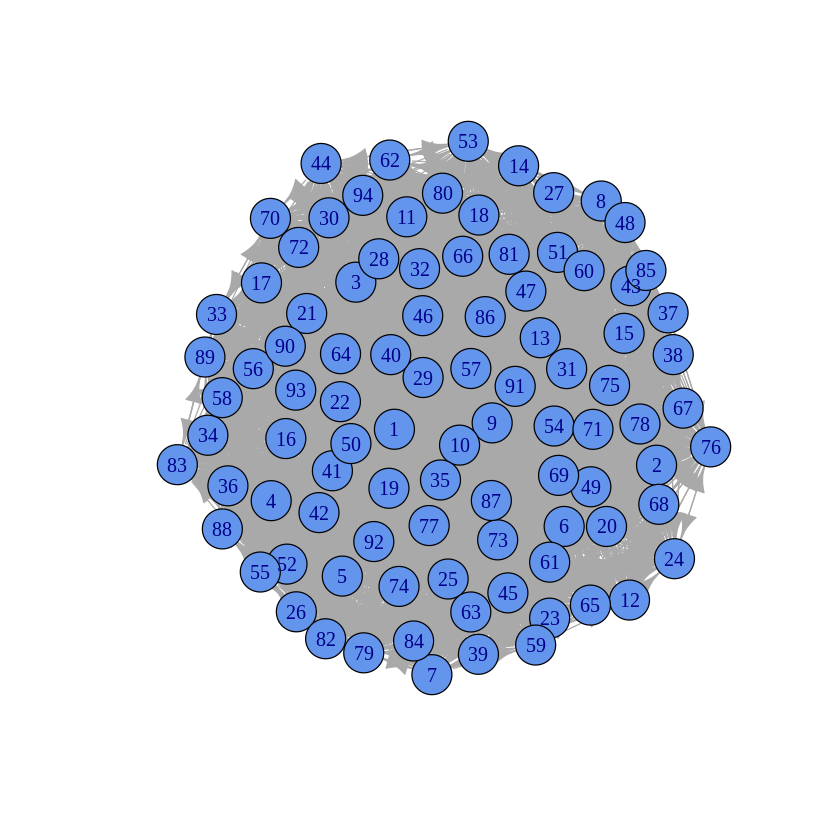

In [10]:
V(data_graph)$color <- "cornflowerblue"
plot(data_graph, layout = layout_with_fr, label = colnames(data_graph))
cat("Количество ребер: ", gsize(data_graph))

3. Была вычислена «пятичисловая сводка» для графа $G_𝑑$.

In [12]:
library(statnet)
network_r <- network(edgelist, matrix.type = "edgelist", directed = TRUE)
cat("Размер графа: ", g)
cat("\nПлотность графа: ", gden(edgelist))
cat("\nЧисло компонент связности: ", igraph::components(data_graph)$no)
cat("\nДиаметр: ")
gd <- geodist(edgelist)
cat(max(gd$gdist[gd$gdist != Inf]))
cat("\nКоэффициент кластеризации =", gtrans(edgelist))

Размер графа:  94
Плотность графа:  0.04251984
Число компонент связности:  1
Диаметр: 2
Коэффициент кластеризации = 0

4. Был вычислен цензус диад. Сделаны выводы.

In [13]:
census <- dyad.census(data_graph)
census

$mut
[1] 1150

$asym
[1] 2161

$null
[1] 1060

В графе 1150 взимных диад (то есть пар акторов, между которыми есть двунаправленная связь), 2161 асимметричные диады (диады, где отношение есть в одну сторону) и 1060 нулевых (нет связи).

5. Была вычислена оценка индекса взаимности Каца—Пауэла при фиксированом выборе акторов $𝑑$ и при свободном выборе. Сделаны выводы.

In [14]:
d <- 30
M <- census$mut
P1 <- (2*M*(g-1) - g*(d**2))/(g*d*(g-1-d))
P1

matrix_r <- as.matrix(network_r)
L <- sum(matrix_r)
L2 <- 0
for(i in 1:nrow(matrix_r)){
    sum <- 0
    for (j in 1:ncol(matrix_r)){
        sum <- sum + matrix_r[i, j]
    }
    L2 <- L2 + (sum**2)
}
P2 <- (2 * M * ((g - 1)**2) - L**2 + L2)/(L * ((g - 1)**2) - L**2 + L2)
P2


[1] 0.7277947

[1] 0.01089605

При фиксированном выбором акторы склонны образовывать связи. При свободном выборе эта оценка гораздо ниже.

6. Была вычислена вероятность того, что связь будет взаимной для каждого случая.

In [61]:
res <- (d**2)/((g - 1)**2)
cat("Вероятность при фиксированном выборе", res)

res2 <- (sum(rowSums(matrix_r)*colSums(matrix_r)) / (g - 1)**2) / g
cat("Вероятность при свободном выборе", res2)

[1] 0.1040583

[1] 0.2607668

7. Был вычислен индекс взаимности Бандиопадхьяйя. Сделаны выводы.

In [32]:
vec <- c()
vec2 <- vec
for(t in 0:g){
    sum_x <- 0
    if (t > 0){
        for(i in 1:t){
            sum_x <- sum_x + sum(matrix_r[i, ])
        }
    }
    vec <- append(vec, sum_x - t * (g - 1) - choose(t, 2))
    sum_g <- 0
    if (t + 1 <= g){
        for(i in (t + 1):g){
            sum_g <- sum_g + min(t, sum(matrix_r[i, ]))
        }
    }
    vec2 <- append(vec2, sum_x - t * (t - 1) - sum_g)
}
M_min <- max(vec)
M_max <- floor(0.5 * (sum(matrix_r) - max(vec2)))
P_Bandyopadhyay <- (M - M_min)/(M_max - M_min)
P_Bandyopadhyay

[1] 0.5156951

Индекс взаимности Бандиопадхьяйя равен 0.516 - в графе примерно половина взаимных диад.

8. Была проверена нулевая гипотеза о том, что число дуг $𝐿$ в орграфе $\cal G_𝑑$ имеет биномиальное распределение $L$~$Bin(g(g-1), 1/2)$  при
уровне значимости $\alpha$. Определен максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [50]:
cat("alpha = ", alpha)
binom.test(L, g*(g-1), p = 0.5)

alpha =  0.04


	Exact binomial test

data:  L and g * (g - 1)
number of successes = 4461, number of trials = 8742, p-value = 0.05555
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.4997569 0.5208264
sample estimates:
probability of success 
             0.5102951 


Максимальный уровень значимости равен 0.05555, что меньше $\alpha$, следовательно, принимается альтернативная гипотеза.

9. Была проверена нулевая гипотеза о том, что число дуг $L$ в орграфе $\cal G_𝑑$ имеет биномиальное распределение $L$~$Bin(g(g-1), P_0)$  при
уровне значимости $\alpha$. Определен максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [48]:
cat("alpha = ", alpha)
binom.test(L, g*(g-1), p = 0.77)

alpha =  0.04


	Exact binomial test

data:  L and g * (g - 1)
number of successes = 4461, number of trials = 8742, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.77
95 percent confidence interval:
 0.4997569 0.5208264
sample estimates:
probability of success 
             0.5102951 


Максимальный уровень значимости примерно равен 2.2e-16, что меньше $\alpha$, следовательно, принимается альтернативная гипотеза.

10. Построен доверительный интервал для оценки параметра $p$ с доверительной надёжностью $(1 - \alpha)$. Сделать выводы.

$ \Phi(z_{a/2}) = 0.5 - \alpha/2 $

$ \Phi(z_{a/2}) = 0.48 $

$z_{a/2} = 2.06$



In [62]:
P_hat <- L/(g*(g-1))
z <- 2.06
P_lower <- P_hat - z * sqrt((P_hat * (1 - P_hat))/(g * (g - 1)))
P_upper <- P_hat + z * sqrt((P_hat * (1 - P_hat))/(g * (g - 1)))
cat('(', P_lower, ',', P_upper, ')')

( 0.4992813 , 0.521309 )

Доверительный интервал оценки параметра $p$ равен (0.4992813 , 0.521309).

## Выводы
Были получены навыки работы с математическими пакетами для статистического анализа социальных сетей. На примере были посчитали число взаимных, симметричных и нулевыд диад. Для графа из 94 вершин и 4461 ребер вероятность появления взаимной диады близка к 0.516.